# Project Statement

**Use current stock data to create two potentially profitable investment
portfolios. One that is higher risk and one that is lower risk.**

**You are to explain your interpretation of a high risk profile and low
risk profile of a portfolio. You should provide some measurable
quantitative data in you explanation.**

# Portfolio Choice and Motivation

It is well documented that investors that invest for consumption goals
in the long term (i.e. to fund consumption \>10 years from the beginning
of investment) can maximize expected return and minimize risk—as defined
by volatility and probability of (un)realized capital loss—by holding
broadly diversified, low cost index funds of risky assests with expected
returns in excess of 3 month US treasury bills. Furthermore, it is
financial dogma to hold differing proportions of the more "risky" stocks
and "safer" bonds according to how close the investor is to their date
of their consumption beginning.

We take the persona of a young investor, defined as an investor entering
a risky portfolio of stocks and bonds to fund consumption occurring a
least 25 years in the future. We accept the dogma of investing in low
cost, total market index funds to hold long term, and base *both* of our
portfolios on the following assumptions:

1.  Invest in total market index funds at a 90% stock/10% bond split
2.  Stocks should be diversified globally
3.  The bond portion will be zero coupon 25+ year Treasury STRIPS

We introduce a 10% bond allocation due to its curtailing of
psychological risk and improving of risk-adjusted returns. Moreover, our
duration exposure to the bonds should be in line with our consumption
timeline. As such, we adopt ultra-long dated Treasury STRIPS, as opposed
to a total bond market fund, which would have an average duration in the
intermediate length of ~6 years. It has been demonstrated that STRIPS
have lower correlation with stocks than intermediate date bonds, and
would provide a stronger diversification benefit, which is desirable in
our framework. We will give empirical evidence for this fact.

Our "low risk" portfolio will consist of 90% global stocks at
**current** market cap weights and 10% 25+ year US Treasury STRIPS.

| Asset             | %   |
|-------------------|-----|
| Total US Stock    | 55  |
| Total ex-US Stock | 35  |
| Total US Treasury | 10  |

The choice of using current market cap weights for the US and ex-US
geographies is to make the portfolio comparable to the high risk
portfolio.

# Risk Factors as Sources of Increased Risk

In Capital Asset Pricing Model (CAPM), the "low" risk portfolio would be
nearly the riskiest portfolio one can come up with, when only
compensated risks are accounted for. A compensated risk is a source of
risk that an investor can expect to be compensated for, while an
investor taking on uncompensated risk cannot expect to increase their
returns for doing so. Examples of uncompensated risks are concentration
risk, where assets are highly concentrated into one asset (e.g. a
particular stock), and idiosyncratic country risk, where one
concentrates their stock holdings in a particular country's stock
market.

The common thread of uncompensated risk is that they can be eliminated
with diversification, something that the "optimal" portfolio in the CAPM
model supports. Our portfolios will also strive to take on only
compensated risks, but short of having a 100% stock allocation, our "low
risk" portfolio is already about as risky as we can get. One then
wonders, how can we take on more **compensated** risk to produce a
higher risk portfolio than the one we have already?

The work of Eugene Fama and Kenneth French provide a possible answer. In
short, Fama and French observed excess alpha (broadly-occurring return
in excess of the market portfolio) in certain stocks that the CAPM could
not explain. Statistically, the CAPM could only explain 70% of the
returns a diversified portfolio of stocks. Fama and French sought to
modify the pricing model to explain more of the returns.

Summarizing their body of research, they proposed two additional *risk
factors*: the size risk factor and value risk factor. By measuring a
diversified stock portfolio's exposure to companies with smaller size
(known as "small cap" companies) and with lower price-to-book values
(known as "value" companies), Fama and French were able to increase the
explanatory power of the CAPM from 70% to \>90% with their additional
risk factors. Their model is called the Fama-French three-factor model.

The risk factors in this model are

1.  Market beta (exposure to diversified stock)
2.  Size
3.  Value

It should be noted that the model improves on the CAPM *empirically* in
how it explains returns, but past returns do not predict the future.
However, there are good reasons to believe thse addition risk factors
should be compensated ones.

# The High Risk Portfolio

The three factor model predicts that a portfolio with higher exposure to
small cap companies and value companies can give returns higher than the
market portfolio. This is the basis for our high risk portfolio.

Sticking with the 90/10 stock/STRIPS allocation, we allocate 50% of each
of our geography's stock markets to small cap value companies in that
geography.

For example, at current market capitalizations, US stocks consist of
approximately 64% of the world's free-float market capitalization, with
ex-US contributing the remaining 36%. In our low risk portfolio, we
allocated 90% of our assets to this split, so our geography breakdown
would be $0.9\ast 0.64 = 57\%$ total US market, and
$0.9\ast 0.36 = 33\%$ total ex-US stock market.

In our high risk portfolio, these would be halved to $28\% $ and $17\%$
for US and ex-US total market, respectively, making way for $29\%$ and
$16\%$ US and ex-US small cap value, respectively.

The choice of $50\% $ dedicated to small cap value in each geography is
somewhat arbitrary, and is likely considered a very aggressive tilt to
the size and value factors. Our high risk portfolio is then

| Asset                    | %   |
|--------------------------|-----|
| Total US Stock           | 28  |
| US Small Cap Value       | 27  |
| Total ex-US Stock        | 18  |
| ex-US Small Cap Value    | 17  |
| 25+ Year Treasury STRIPS | 10  |

# Risk of Small Cap Value

Though we have used the three factor model to incorporate new sources of
risk into our high risk portfolio, it turns out that we have
incorporated assets that have higher risk even in traditional metrics of
risk such as volatitily. Let us demonstrate this empirically.

We will use the Dimensional funds' DFSVX and DISVX as our representative
tickers for US small cap value and ex-US small cap value, respectively.
We will compare the volatility of these funds against their respective
geography's total stock markets, represented by `VTI` and `VXUS` for US
and ex-US.

In order to capture the **total** return of these assets, we choose to
use data from [testfolio](https://testfol.io), a portfolio backtesting
tool that captures total returns of a portfolio, not just price action
like Yahoo Finance. The data we load gives the hypothetical growth of 4
portfolios, each invested 100% into one of the assets above.

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

us_exus = pd.read_csv("./us-exus.csv")
# us_exus.index = pd.to_datetime(us_exus["Date"])
us_exus.set_index(pd.to_datetime(us_exus["Date"]),inplace=True)
us_exus.drop("Date",axis=1,inplace=True)
us_exus.plot(rot=70)


``` example
<Axes: xlabel='Date'>
```

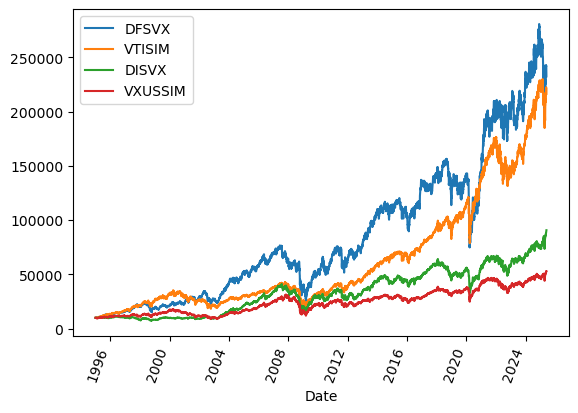

In [ ]:
day_returns = (us_exus -us_exus.shift(1)) / us_exus.shift(1)
day_returns.describe()


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>DFSVX</th>
      <th>VTISIM</th>
      <th>DISVX</th>
      <th>VXUSSIM</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>7651.000000</td>
      <td>7651.000000</td>
      <td>7651.000000</td>
      <td>7651.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>0.000512</td>
      <td>0.000475</td>
      <td>0.000340</td>
      <td>0.000284</td>
    </tr>
    <tr>
      <th>std</th>
      <td>0.014160</td>
      <td>0.012051</td>
      <td>0.010129</td>
      <td>0.011562</td>
    </tr>
    <tr>
      <th>min</th>
      <td>-0.130435</td>
      <td>-0.122971</td>
      <td>-0.099544</td>
      <td>-0.103702</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>-0.006110</td>
      <td>-0.004550</td>
      <td>-0.004272</td>
      <td>-0.004959</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>0.001067</td>
      <td>0.000792</td>
      <td>0.000592</td>
      <td>0.000674</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>0.007328</td>
      <td>0.006162</td>
      <td>0.005592</td>
      <td>0.006033</td>
    </tr>
    <tr>
      <th>max</th>
      <td>0.105467</td>
      <td>0.113965</td>
      <td>0.089898</td>
      <td>0.121416</td>
    </tr>
  </tbody>
</table>
</div>

The "SIM" suffix indicates that the time series is simulating returns of
the ticker in the prefix. e.g. "VTISIM" represents the total return of
the total US equity market, as VTI has only been around since 2001.

With the data of daily returns in hand, we can compare volatilities over
the period from June 1996 to today.

In [ ]:
import numpy as np
log_returns = np.log(day_returns+1).dropna()
# log_returns.describe()
(np.sqrt(252)*log_returns).describe().loc["std"]


``` example
DFSVX      0.225398
VTISIM     0.191638
DISVX      0.161345
VXUSSIM    0.183918
Name: std, dtype: float64
```

One can see that the volatility of returns of US small cap value is
higher than the total stock market index, while it is slightly lower in
the ex-US geography. In this sense, adding these assets to the low risk
portfolio increases the volatility, making it higher risk in traditional
metrics. We can also visually inspect a histogram of daily returns and
see how they are distributed.

In [ ]:
(100*day_returns).plot(kind="hist",bins=120,xlabel = "Daily Return (%)",
                 xlim=(-3.5,3.5),
                 ylabel = "Observations",
                 subplots=True,layout=(2,2),
                 title = "Distributions of Daily Returns")


``` example
array([[<Axes: xlabel='Daily Return (%)', ylabel='Observations'>,
        <Axes: xlabel='Daily Return (%)', ylabel='Observations'>],
       [<Axes: xlabel='Daily Return (%)', ylabel='Observations'>,
        <Axes: xlabel='Daily Return (%)', ylabel='Observations'>]],
      dtype=object)
```

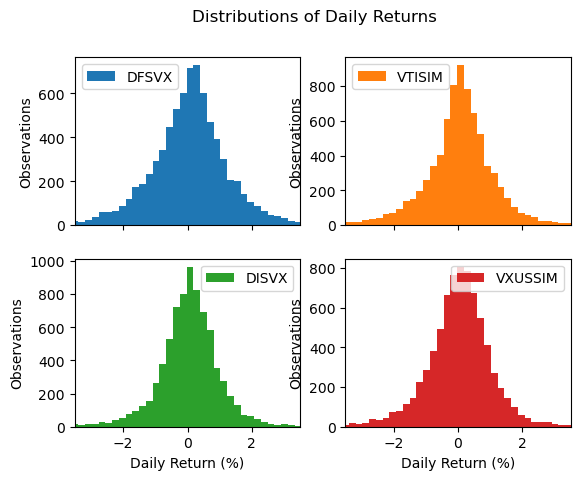

The US small cap value asset has fatter tails than the total market
counterpart in the same geography, as demonstrated by the higher
volatility earlier. However, both geographies see a higher mean in the
small cap value class. This is good, as it indicates that the small cap
value risk has historically been compensated.

# Tracking Error as Behavioral Risk

Concentration of assets in some that are more volatile than others does
not necessarily make a portfolio more risky. We saw in the previous
section that the ex-US small cap value actually has slightly *lower*
volatlility than the total market counterpart. We argue that the
portfolio with concentration in small cap value is riskier due to
tracking error: the difference in performance of certain assets compared
to a benchmark.

When one holds the market portfolio, one is content that the market is
accurately pricing all information in and producing the average of all
performance. Our second portfolio deviates from the market portfolio,
opening an investor to certain psychological risks associated with
tracking error (i.e. active risk). If the held portfolio is
underperforming the market, the investor might get uncomfortable
sticking with the same portfolio, and rebalance away from it, preventing
actualization of the risk premia in the 3F model. Let us demonstrate
this risk exists.

## Small Cap Value vs. Total Market Tracking Error

Given an asset's returns $A_t$ and a benchmark's returns $B_t$ over a
time period $[0,T]$, the tracking error of asset $A$ over the time
period is computed as $$\operatorname{std}(A_T - B_{T}).$$ We will
compare the SCV assets to their same geography's total market assets as
a benchmark.

In [ ]:
yearly_rets = (1+day_returns).groupby(pd.Grouper(freq="YE")).agg("prod")-1
us_tracking_error = (yearly_rets["DFSVX"]-yearly_rets["VTISIM"]).dropna().describe()["std"]
print(f"US Small Value Tracking error: {100*us_tracking_error:.2f}%")


``` example
US Small Value Tracking error: 14.30%
```

In [ ]:
(100*yearly_rets).describe()


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>DFSVX</th>
      <th>VTISIM</th>
      <th>DISVX</th>
      <th>VXUSSIM</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>32.000000</td>
      <td>32.000000</td>
      <td>32.000000</td>
      <td>32.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>12.173343</td>
      <td>11.664464</td>
      <td>9.175259</td>
      <td>7.047925</td>
    </tr>
    <tr>
      <th>std</th>
      <td>20.188332</td>
      <td>17.939760</td>
      <td>20.957356</td>
      <td>18.413280</td>
    </tr>
    <tr>
      <th>min</th>
      <td>-36.785480</td>
      <td>-36.948992</td>
      <td>-41.678019</td>
      <td>-43.999425</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>-4.462004</td>
      <td>0.303825</td>
      <td>-0.772098</td>
      <td>-4.099137</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>11.311708</td>
      <td>16.043307</td>
      <td>6.839869</td>
      <td>11.342716</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>25.981564</td>
      <td>24.430837</td>
      <td>21.569756</td>
      <td>16.446349</td>
    </tr>
    <tr>
      <th>max</th>
      <td>59.403412</td>
      <td>35.975306</td>
      <td>66.480767</td>
      <td>40.591887</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
exus_tracking_error = (yearly_rets["DISVX"]-yearly_rets["VXUSSIM"]).dropna().describe()["std"]
print(f"US Small Value Tracking error: {100*exus_tracking_error:.2f}%")


``` example
US Small Value Tracking error: 10.48%
```

The annual returns of both SCV geographies show tracking error of \>10%
compared to their geography's total market portfolio, opening up a long
term investor to active risk of underperformance of a benchmark. So long
as the investor does not adjust their portfolio, the risks taken can
still be compensated, but this is another way in which the second
portfolio is riskier.

## SCV Underperformance

Along with tracking error, SCV has been demonstrated to show significant
periods of the worst kind of tracking error: underperformance. This
compounds the behavioral risk of concentrating more of an investor's
capital into SCV, since performance chasing is an oft-observed
phenomenon. We will compare rolling annual returns of the SCV to the
total market portfolios in their geography to demonstrate this.

In [ ]:
scv_over_market = yearly_rets["DFSVX"]-yearly_rets["VTISIM"]
scv_over_market.index = scv_over_market.index.year
(100*scv_over_market).plot(kind="bar",
                     ylabel="$\\Delta$ %",
                     xlabel="Year",
                     title="DFSVX over VTI Returns",
                     rot=70)


``` example
<Axes: title={'center': 'DFSVX over VTI Returns'}, xlabel='Year', ylabel='$\\Delta$ %'>
```

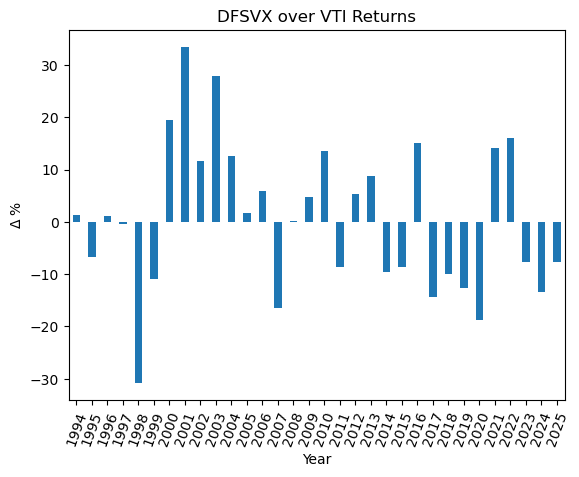

As one can see, US SCV sees multiyear periods of underperformance
compared to a total market portfolio, particularly recently.

In [ ]:
ex_scv_over_market = yearly_rets["DFSVX"]-yearly_rets["VXUSSIM"]
ex_scv_over_market.index = ex_scv_over_market.index.year
(100*ex_scv_over_market).plot(kind="bar",
                     ylabel="$\\Delta$ %",
                     xlabel="Year",
                     title="DISVX over VXUS Returns",
                     rot=70)


``` example
<Axes: title={'center': 'DISVX over VXUS Returns'}, xlabel='Year', ylabel='$\\Delta$ %'>
```

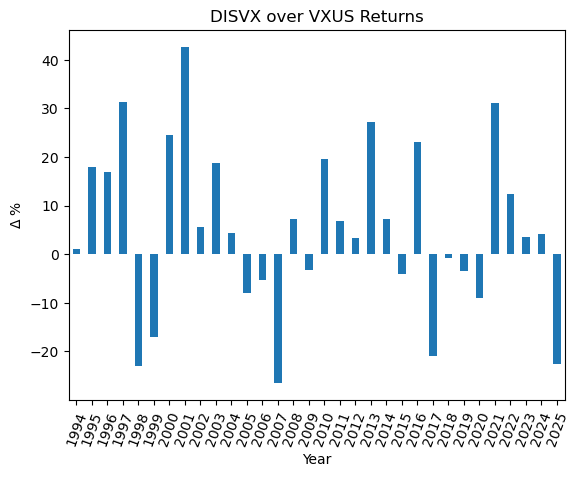

Ex-US SCV fares better, but a general pattern is observed that periods
of annual SCV underperformance are usually catastrophic, producing very
high annual tracking errors and risk of underperformance in any given
annual period.

# Comparison of Bond Choices

In [ ]:
def csv_to_series(csv_path):
    s = pd.read_csv(csv_path)
    s["Date"] = pd.to_datetime(s["Date"])
    s.set_index("Date",inplace = True)
    returns = (s-s.shift(1)) / s.shift(1)
    returns.columns = [ticker + " Returns" for ticker in s.columns]
    return pd.concat([s, returns],axis=1)


In [ ]:
govt = csv_to_series("./GOVT-returns.csv")
zroz = csv_to_series("./ZROZ-returns.csv")
zroz
(np.log(pd.concat([1+ govt.drop("GOVT",axis=1),
                  1+zroz.drop("ZROZ",axis=1)]))*np.sqrt(252)).describe().loc["std"]


``` example
GOVT Returns    0.061450
ZROZ Returns    0.244891
Name: std, dtype: float64
```

One sees that the daily returns of zero coupon bonds is significantly
more volatile than treasuries with lower duration, with data going back
to July 1969. However, this volatility is not taken arbitrarily. The
stripping of interest payments from zero coupon bonds increases their
expected returns over interest paying ones. Since we are interested in
long term investing for both of our portfolios, we compare the calendar
year returns

In [ ]:
yearly_zroz = ((1+zroz["ZROZ Returns"]).groupby(pd.Grouper(freq = "YE")).agg("prod")-1)
yearly_govt = ((1+govt["GOVT Returns"]).groupby(pd.Grouper(freq = "YE")).agg("prod")-1)
pd.concat([100*yearly_zroz,
           100*yearly_govt],axis=1).plot(
               y = ["ZROZ Returns", "GOVT Returns"],
               title="Calendar year returns",
               ylabel= "Return (%)",
               xlabel = "Year")


``` example
<Axes: title={'center': 'Calendar year returns'}, xlabel='Year', ylabel='Return (%)'>
```

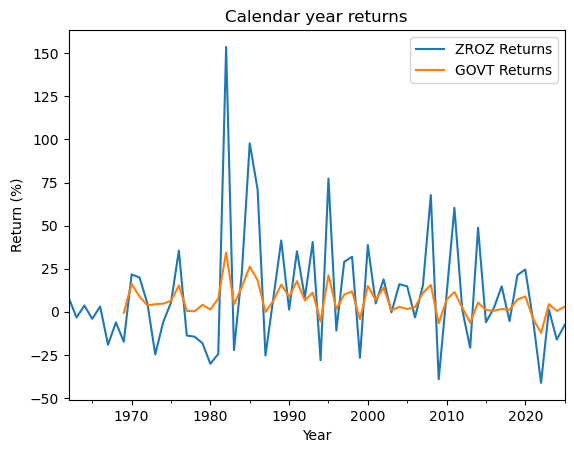

Visually, the volatility difference is very stark. The returns appear to
agree in their direction, but differ strongly in magnitude, which is
consistent with the interpretation of ultra-long duration bonds as a
leveraged bond allocation. It appears that the zero coupon bonds have
acted as "bonds++", increasing the magnitude of returns on
intermediate-duration treasuries.

Those invested in zero coupon bonds in the 80s likely have chronic ulcer
issues.

# Volatility Analysis of Portfolios

In [ ]:
inception = "1994-12-29"

disvx = csv_to_series("./DISVX-returns.csv")[inception:]["DISVX Returns"]
dfsvx = csv_to_series("./DFSVX-returns.csv")[inception:]["DFSVX Returns"]
vti = csv_to_series("./VTI-returns.csv")[inception:]["VTI Returns"]
vxus = csv_to_series("./VXUS-returns.csv")[inception:]["VXUS Returns"]
govt = csv_to_series("./GOVT-returns.csv")[inception:]["GOVT Returns"]
zroz = csv_to_series("./ZROZ-returns.csv")[inception:]["ZROZ Returns"]


In [ ]:
p1 = 0.55*vti + 0.35*vxus + 0.1*govt
p2 = 0.28*vti + 0.27*dfsvx + 0.18*vxus + 0.17*disvx + 0.10*zroz


We have argued from a couple angles that the second portfolio is riskier
than the first portfolio, but in the aggregate, we observe something
interesting:

In [ ]:
p1sig = np.log(1+p1).describe()["std"]*np.sqrt(252)
p2sig = np.log(1+p2).describe()["std"]*np.sqrt(252)
print(f"Portfolio 1 Volatility: {p1sig:.3f}\nPortfolio 2 Volatility: {p2sig:.3f}")


``` example
Portfolio 1 Volatility: 0.159
Portfolio 2 Volatility: 0.155
```

In the end, adding all those volatile assets actually **lowered** the
portfolio's overall volatility! This result should be surprising given
concentration risk and the kinds of assets we added, but is it not so
surprising from a diversification standpoint. We ended up concentrating
more capital in assets that were more uncorrelated with each other,
smoothing out the ride of returns.

# A Backtest

We can backtest our two portfolios to get an idea of how they would have
performed against each other, had our hypothetical investor invested in
them for the tested period.

In [ ]:
both = pd.concat([p1,p2],axis = 1).set_axis(["Portfolio 1 Returns", "Portfolio 2 Returns"],axis=1)
both.describe()


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Portfolio 1 Returns</th>
      <th>Portfolio 2 Returns</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>7655.000000</td>
      <td>7651.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>0.000379</td>
      <td>0.000417</td>
    </tr>
    <tr>
      <th>std</th>
      <td>0.010031</td>
      <td>0.009731</td>
    </tr>
    <tr>
      <th>min</th>
      <td>-0.101993</td>
      <td>-0.096627</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>-0.003901</td>
      <td>-0.003972</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>0.000677</td>
      <td>0.000774</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>0.005091</td>
      <td>0.005208</td>
    </tr>
    <tr>
      <th>max</th>
      <td>0.105189</td>
      <td>0.090987</td>
    </tr>
  </tbody>
</table>
</div>

We inspect the distribution of returns on each of the portfolios.

In [ ]:
(100*both).plot(kind="hist",
                bins = 80,
                subplots=True,
                title = "Distribution of Monthly Returns (%)",
                xlabel = "Daily Return (%)")


``` example
array([<Axes: xlabel='Daily Return (%)', ylabel='Frequency'>,
       <Axes: xlabel='Daily Return (%)', ylabel='Frequency'>],
      dtype=object)
```

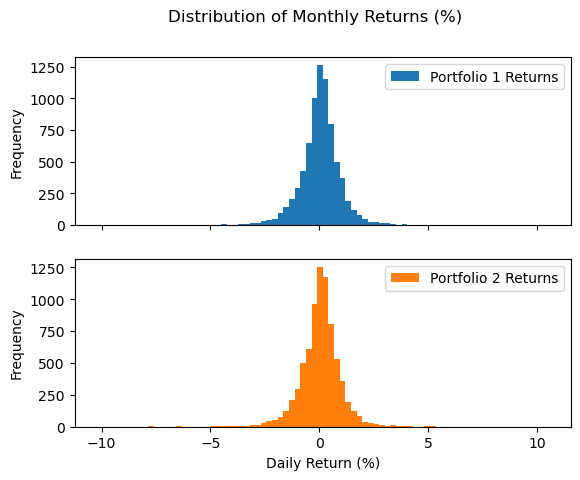

Finally, we backtest both portfolios with a starting value of of \$1000
invested on 1994-12-28.

In [ ]:
((1+both).cumprod()*1000).plot(title = "Growth of $1000")


``` example
<Axes: title={'center': 'Growth of $1000'}, xlabel='Date'>
```

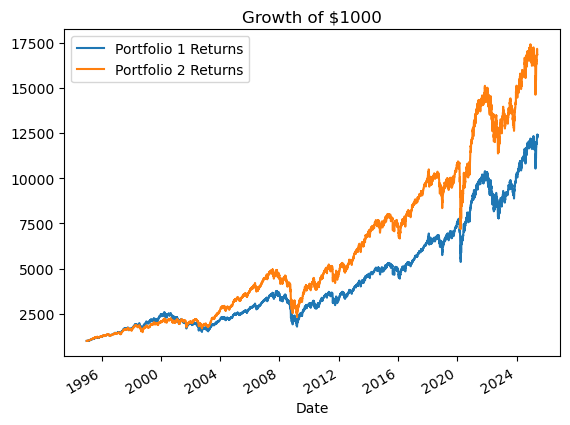

The higher risk portfolio ended up with higher total returns for this
period. Obviously, past performance is not an indicator of future
results, but the additional risk we took appears to have been
compensated.

Finally, we can look at the over-under on returns of our riskier
portfolio:

In [ ]:
ou = both["Portfolio 2 Returns"] - both["Portfolio 1 Returns"]
ou = (1+ ou).groupby(pd.Grouper(freq="YE")).agg("prod")-1
ou.index = ou.index.year
(100*ou).plot(kind="bar",
              rot = 70,
              title="High Risk Returns - Low Risk Returns",
              ylabel="%\\Delta$% Return",
              xlabel="Year")


``` example
<Axes: title={'center': 'High Risk Returns - Low Risk Returns'}, xlabel='Year', ylabel='%\\Delta$% Return'>
```

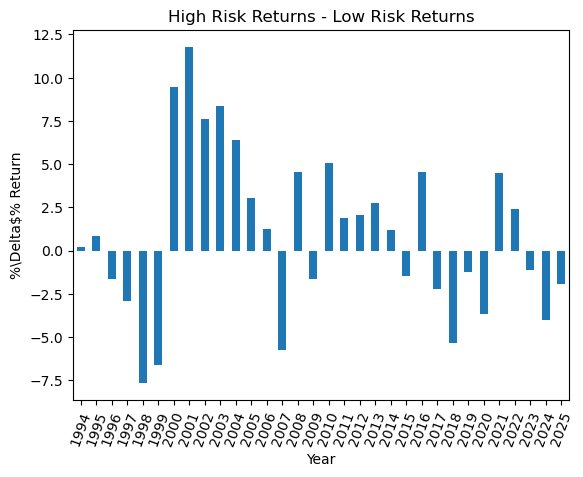

The difference in returns largely follows the trends we observed with
SCV over/underperformance, but the magnitude is blunted by the inclusion
of some total market funds and the bonds to even things out.